In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import os
import pandas as pd

dropbox_path = os.path.abspath("D:/Dropbox/datasets")
onedrive_path = os.path.abspath("D:/OneDrive - Singapore Management University/datasets")

ratings_path = os.path.join(onedrive_path, "netflix-cornac", "data.csv") # 2.43GB processed UIRT dataset from cornac: U480k, I17770, R100M
ratings_path = os.path.join(onedrive_path, "netflix-cornac", "data_small.csv") # 15MB processed UIRT dataset from cornac: U10k, I4945, R608k
titles_path = os.path.join(onedrive_path, "netflix-cornac", "movie_titles.csv") # processed IYN dataset: I=item, Y=year, N=name
genres_path = os.path.join(onedrive_path, "netflix-genres", "netflix_genres.csv") # processed genres from GitHub

In [5]:
# read netflix ratings

names = ['uid','iid','rating','date']
df_ratings = pd.read_csv(ratings_path, header=None, names=names)
df_ratings['date'] = pd.to_datetime(df_ratings['date'])
df_ratings.head()

,uid,iid,rating,date
0,2567280,2,3,2005-03-17
1,1478381,3,4,2005-05-26
2,1045221,3,1,2003-05-13
3,811218,3,5,2004-05-11
4,1272379,3,1,2005-01-19


In [6]:
# read movie titles

names = ['iid', 'year', 'title']
df_titles = pd.read_csv(titles_path, header=None, names=names)
df_titles['year'] = pd.to_datetime(df_titles['year'])
df_titles.head()

,iid,year,title
0,1,1970-01-01 00:00:00.000002003,Dinosaur Planet
1,2,1970-01-01 00:00:00.000002004,Isle of Man TT 2004 Review
2,3,1970-01-01 00:00:00.000001997,Character
3,4,1970-01-01 00:00:00.000001994,Paula Abdul's Get Up & Dance
4,5,1970-01-01 00:00:00.000002004,The Rise and Fall of ECW


In [7]:
# read movie genres

df = pd.read_csv(genres_path)
df = df.rename(columns={'movieId': 'iid'})
genres = df['genres'].str.get_dummies(sep='|')
df_genres = pd.concat([df['iid'], genres], axis=1)
df_genres.head()

In [ ]:
# summary

print("Dimensions: ", df_ratings.shape)
print("Number of users: %d" % df_ratings.uid.drop_duplicates().count())
print("Number of items: %d" % df_ratings.iid.drop_duplicates().count())
print("Starting date:", df_ratings['date'].min())
print("Ending date:", df_ratings['date'].max())

Dimensions:  (607803, 4)
Number of users: 9992
Number of items: 4945
Starting date: 1999-12-24 00:00:00
Ending date: 2005-12-31 00:00:00


In [ ]:
# filter out movies in df_genres that are not in df_ratings (for Netflix_small)

df_genres = df_genres[df_genres['iid'].isin(df_ratings['iid'])]
df_genres

,iid,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
1,3,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,12,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10,17,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,19,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,17742,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
12261,17747,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12264,17753,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
12272,17762,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
# find genres that cover less then 1% of the movies

stat = df_genres.sum()
stat

iid            30498363
Action              622
Adventure           436
Animation           190
Biography           167
Comedy             1157
Crime               536
Documentary         311
Drama              1686
Family              317
Fantasy             299
Film-Noir            25
Game-Show             3
History             136
Horror              358
Music               223
Musical             137
Mystery             309
News                  1
Reality-TV           13
Romance             754
Sci-Fi              328
Short                57
Sport               110
Talk-Show            25
Thriller            713
War                 161
Western              99
dtype: int64

In [ ]:
# find genres that cover less then 1% of the movies

stat = df_genres.sum()
genre_list = stat[stat < (len(df_genres) / 100)].index.tolist()
genre_list

['Film-Noir', 'Game-Show', 'News', 'Reality-TV', 'Talk-Show']

In [ ]:
# remove genres that cover less then 1% of the movies

idx = df_genres[df_genres[genre_list].eq(1).any(axis=1)].index
idx

Int64Index([    8,    18,   399,   444,   690,  1371,  1408,  1490,  1559,
             1562,  1577,  1871,  2115,  2314,  2500,  2770,  3184,  3272,
             3282,  3303,  3924,  4037,  4282,  4606,  4935,  5466,  5826,
             5945,  6140,  6205,  6493,  6509,  6870,  7201,  7328,  7375,
             7571,  7864,  8212,  8419,  8633,  8869,  9049,  9203,  9364,
             9367,  9426,  9610,  9620,  9939, 10167, 10183, 10317, 10344,
            10550, 10600, 10730, 10901, 10999, 11153, 11364, 11772, 11816,
            12179],
           dtype='int64')

In [ ]:
# remove genres that cover less then 1% of the movies

df_genres.drop(idx, inplace=True)
df_genres.drop(columns=genre_list, axis=1, inplace=True)
df_genres

,iid,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
1,3,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7,9,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,17,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,19,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,20,0,0,0,0,1,0,0,1,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,17742,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12261,17747,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
12264,17753,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12272,17762,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
# find matching movies that exists in df_genres

df_ratings = df_ratings[df_ratings['iid'].isin(df_genres['iid'])]
df_ratings

,uid,iid,rating,date
1,1478381,3,4,2005-05-26
2,1045221,3,1,2003-05-13
3,811218,3,5,2004-05-11
4,1272379,3,1,2005-01-19
5,1697078,3,2,2005-01-04
...,...,...,...,...
607792,2554035,17765,1,2001-02-05
607793,798296,17765,2,2002-10-02
607794,325073,17765,2,2000-12-01
607795,2305164,17765,2,2005-06-14


In [ ]:
# get matrix index

df_ratings['row_idx'] = pd.factorize(df_ratings['uid'])[0]
df_ratings['col_idx'] = pd.factorize(df_ratings['iid'])[0]
df_ratings

,uid,iid,rating,date,row_idx,col_idx
1,1478381,3,4,2005-05-26,0,0
2,1045221,3,1,2003-05-13,1,0
3,811218,3,5,2004-05-11,2,0
4,1272379,3,1,2005-01-19,3,0
5,1697078,3,2,2005-01-04,4,0
...,...,...,...,...,...,...
607792,2554035,17765,1,2001-02-05,599,3361
607793,798296,17765,2,2002-10-02,22,3361
607794,325073,17765,2,2000-12-01,326,3361
607795,2305164,17765,2,2005-06-14,675,3361


In [ ]:
df_U_idmap = df_ratings.drop_duplicates(subset=['uid', 'row_idx'])[['uid', 'row_idx']]
df_V_idmap = df_ratings.drop_duplicates(subset=['iid', 'col_idx'])[['iid', 'col_idx']]
df_ratings_triplet = df_ratings[['row_idx', 'col_idx', 'rating']]

In [ ]:
df_U_idmap

,uid,row_idx
1,1478381,0
2,1045221,1
3,811218,2
4,1272379,3
5,1697078,4
...,...,...
574023,1923270,9975
579483,1541139,9976
584502,1006729,9977
592047,609169,9978


In [ ]:
df_V_idmap

,iid,col_idx
1,3,0
41,9,1
58,17,2
221,19,3
244,20,4
...,...,...
607044,17742,3357
607065,17747,3358
607095,17753,3359
607096,17762,3360


In [ ]:
df_ratings_triplet

,row_idx,col_idx,rating
1,0,0,4
2,1,0,1
3,2,0,5
4,3,0,1
5,4,0,2
...,...,...,...
607792,599,3361,1
607793,22,3361,2
607794,326,3361,2
607795,675,3361,2


### Genre as Y

In [ ]:
df_genres

,iid,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
1,3,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7,9,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,17,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,19,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,20,0,0,0,0,1,0,0,1,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,17742,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12261,17747,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
12264,17753,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12272,17762,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
# make sure all movies are in df_genres
df_genres = df_genres[df_genres['iid'].isin(df_ratings['iid'])]
df_genres

,iid,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
1,3,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7,9,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,17,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,19,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,20,0,0,0,0,1,0,0,1,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,17742,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12261,17747,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
12264,17753,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12272,17762,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
df_genres = df_genres.set_index('iid').stack().reset_index()
df_genres.columns = ['iid', 'genre', 'value']
df_genres

,iid,genre,value
0,3,Action,0
1,3,Adventure,0
2,3,Animation,0
3,3,Biography,0
4,3,Comedy,0
...,...,...,...
73959,17765,Short,0
73960,17765,Sport,0
73961,17765,Thriller,0
73962,17765,War,0


In [ ]:
idx = df_genres[df_genres['value'] == 0].index

In [ ]:
idx

Int64Index([    0,     1,     2,     3,     4,     6,     8,     9,    10,
               11,
            ...
            73953, 73954, 73955, 73956, 73957, 73959, 73960, 73961, 73962,
            73963],
           dtype='int64', length=64940)

In [ ]:
df_genres = df_genres.drop(index=idx)
df_genres

,iid,genre,value
5,3,Crime,1
7,3,Drama,1
14,3,Mystery,1
26,9,Comedy,1
33,9,Horror,1
...,...,...,...
73939,17762,Thriller,1
73942,17765,Action,1
73943,17765,Adventure,1
73950,17765,Family,1


In [ ]:
len(pd.factorize(df_genres['genre'])[0])

9024

In [ ]:
# get matrix index

df_genres['row_idx'] = pd.factorize(df_genres['genre'])[0]
df_genres = df_genres.merge(df_V_idmap[['iid', 'col_idx']], on='iid', how='left')
df_genres

,iid,genre,value,row_idx,col_idx
0,3,Crime,1,0,0
1,3,Drama,1,1,0
2,3,Mystery,1,2,0
3,9,Comedy,1,3,1
4,9,Horror,1,4,1
...,...,...,...,...,...
9019,17762,Thriller,1,7,3360
9020,17765,Action,1,6,3361
9021,17765,Adventure,1,11,3361
9022,17765,Family,1,8,3361


In [ ]:
df_W_alias = df_genres.drop_duplicates(subset=['genre', 'row_idx'])[['genre', 'row_idx']]
df_M_idmap = df_genres.drop_duplicates(subset=['iid', 'col_idx'])[['iid', 'col_idx']]
df_genres_triplet = df_genres[['row_idx', 'col_idx', 'value']]

In [ ]:
df_W_alias

,genre,row_idx
0,Crime,0
1,Drama,1
2,Mystery,2
3,Comedy,3
4,Horror,4
5,Sci-Fi,5
6,Action,6
9,Thriller,7
14,Family,8
15,Musical,9


In [ ]:
df_M_idmap # same as V idmap

,iid,col_idx
0,3,0
3,9,1
6,17,2
10,19,3
12,20,4
...,...,...
9008,17742,3357
9012,17747,3358
9014,17753,3359
9017,17762,3360


In [ ]:
df_M_alias = df_titles.merge(df_M_idmap[['iid', 'col_idx']], on='iid', how='right')
df_M_alias = df_M_alias[['iid', 'title', 'col_idx']]
df_M_alias

,iid,title,col_idx
0,3,Character,0
1,9,Class of Nuke 'Em High 2,1
2,17,7 Seconds,2
3,19,By Dawn's Early Light,3
4,20,Seeta Aur Geeta,4
...,...,...,...
3357,17742,Catherine the Great,3357
3358,17747,Eric Clapton: 24 Nights,3358
3359,17753,Maslin Beach,3359
3360,17762,Gattaca,3360


In [ ]:
df_genres_triplet

,row_idx,col_idx,value
0,0,0,1
1,1,0,1
2,2,0,1
3,3,1,1
4,4,1,1
...,...,...,...
9019,7,3360,1
9020,6,3361,1
9021,11,3361,1
9022,8,3361,1


In [ ]:
# prepare to load into dataset: build factors

U_order = df_U_idmap['row_idx'].values.astype(int)
U_idmap = df_U_idmap['uid'].values.astype(int)
U_alias = df_U_idmap['uid'].values.astype(str)

V_order = df_V_idmap['col_idx'].values.astype(int)
V_idmap = df_V_idmap['iid'].values.astype(int)
V_alias = df_M_alias['title'].values.astype(str) # borrowed alias from M

M_order = df_M_idmap['col_idx'].values.astype(int) # same as above
M_idmap = df_M_idmap['iid'].values.astype(int)
M_alias = df_M_alias['title'].values.astype(str)

W_order = df_W_alias['row_idx'].values.astype(int)
W_idmap = df_W_alias['row_idx'].values.astype(int)
W_alias = df_W_alias['genre'].values.astype(str)

In [ ]:
from scipy.sparse import csr_matrix
from datasets import Data, Dataset

# prepare to load into dataset: build matrices

rows = df_ratings_triplet['row_idx'].values.astype(int)
cols = df_ratings_triplet['col_idx'].values.astype(int)
values = df_ratings_triplet['rating'].values.astype(int)
X_matrix = csr_matrix((values, (rows, cols)))
print(X_matrix.nnz)

# load into Data (can also load into Dataset directly)

X_data = Data()
X_data.X.update(matrix=X_matrix, name='X')
X_data.U.update(order=U_order, idmap=U_idmap, alias=U_alias, name='U')
X_data.V.update(order=V_order, idmap=V_idmap, alias=V_alias, name='V')

540413


In [ ]:
# prepare to load into dataset: build matrices

rows = df_genres_triplet['row_idx'].values.astype(int)
cols = df_genres_triplet['col_idx'].values.astype(int)
values = df_genres_triplet['value'].values.astype(int)
Z_matrix = csr_matrix((values, (rows, cols)))
print(Z_matrix.nnz)

# load into Data (can also load into Dataset directly)

Z_data = Data()
Z_data.X.update(matrix=Z_matrix, name='Z')
Z_data.U.update(order=W_order, idmap=W_idmap, alias=W_alias, name='W')
Z_data.V.update(order=M_order, idmap=M_idmap, alias=M_alias, name='V')

9024


# Update

In [2]:
# summary
from datasets import Dataset, NetflixData, NetflixGenreData
X_data = NetflixData(small=True)
Z_data = NetflixGenreData(small=True)

In [3]:
X_data.U.alias

array(['1478381', '1045221', '811218', ..., '1006729', '609169',
       '2577021'], dtype='<U21')

In [4]:
# downsampling
import random
sum_u, sum_v = X_data.X.sum
idx_u = sum_u < 20
print(len(sum_u), sum(idx_u))

X_data.sample(idx=idx_u, axis=0)
print(X_data.X.shape, len(X_data.U.order))

X_data.sample(n=3000, seed=1024, axis=0)
print(X_data.X.shape, len(X_data.U.order))

9980 4413
(4413, 3362) 4413


[I] dataset seed : 1024
[I] seed         : 1024
(3000, 3362) 3000


In [6]:
idx = X_data.sample(n=2000, axis=1)
print(X_data.X.shape, len(X_data.U.order))

Z_data.sample(idx=idx, axis=1)
print(Z_data.X.shape, len(Z_data.U.order))

[I] seed         : 1024
(3000, 2000) 3000
(22, 2000) 22


In [7]:
X_data.U.order

array([   0,    1,    2, ..., 2997, 2998, 2999])

[I] Mean num of Vs per U in X: 4.9
[I] Mean num of Us per V in X: 7.4
[I] Median num of Vs per U in X: 5.0
[I] Median num of Us per V in X: 1.0
[I] Mean num of Vs per W in Z: 244.4
[I] Mean num of Ws per V in Z: 2.7
[I] Median num of Vs per W in Z: 171.0
[I] Median num of Ws per V in Z: 3.0


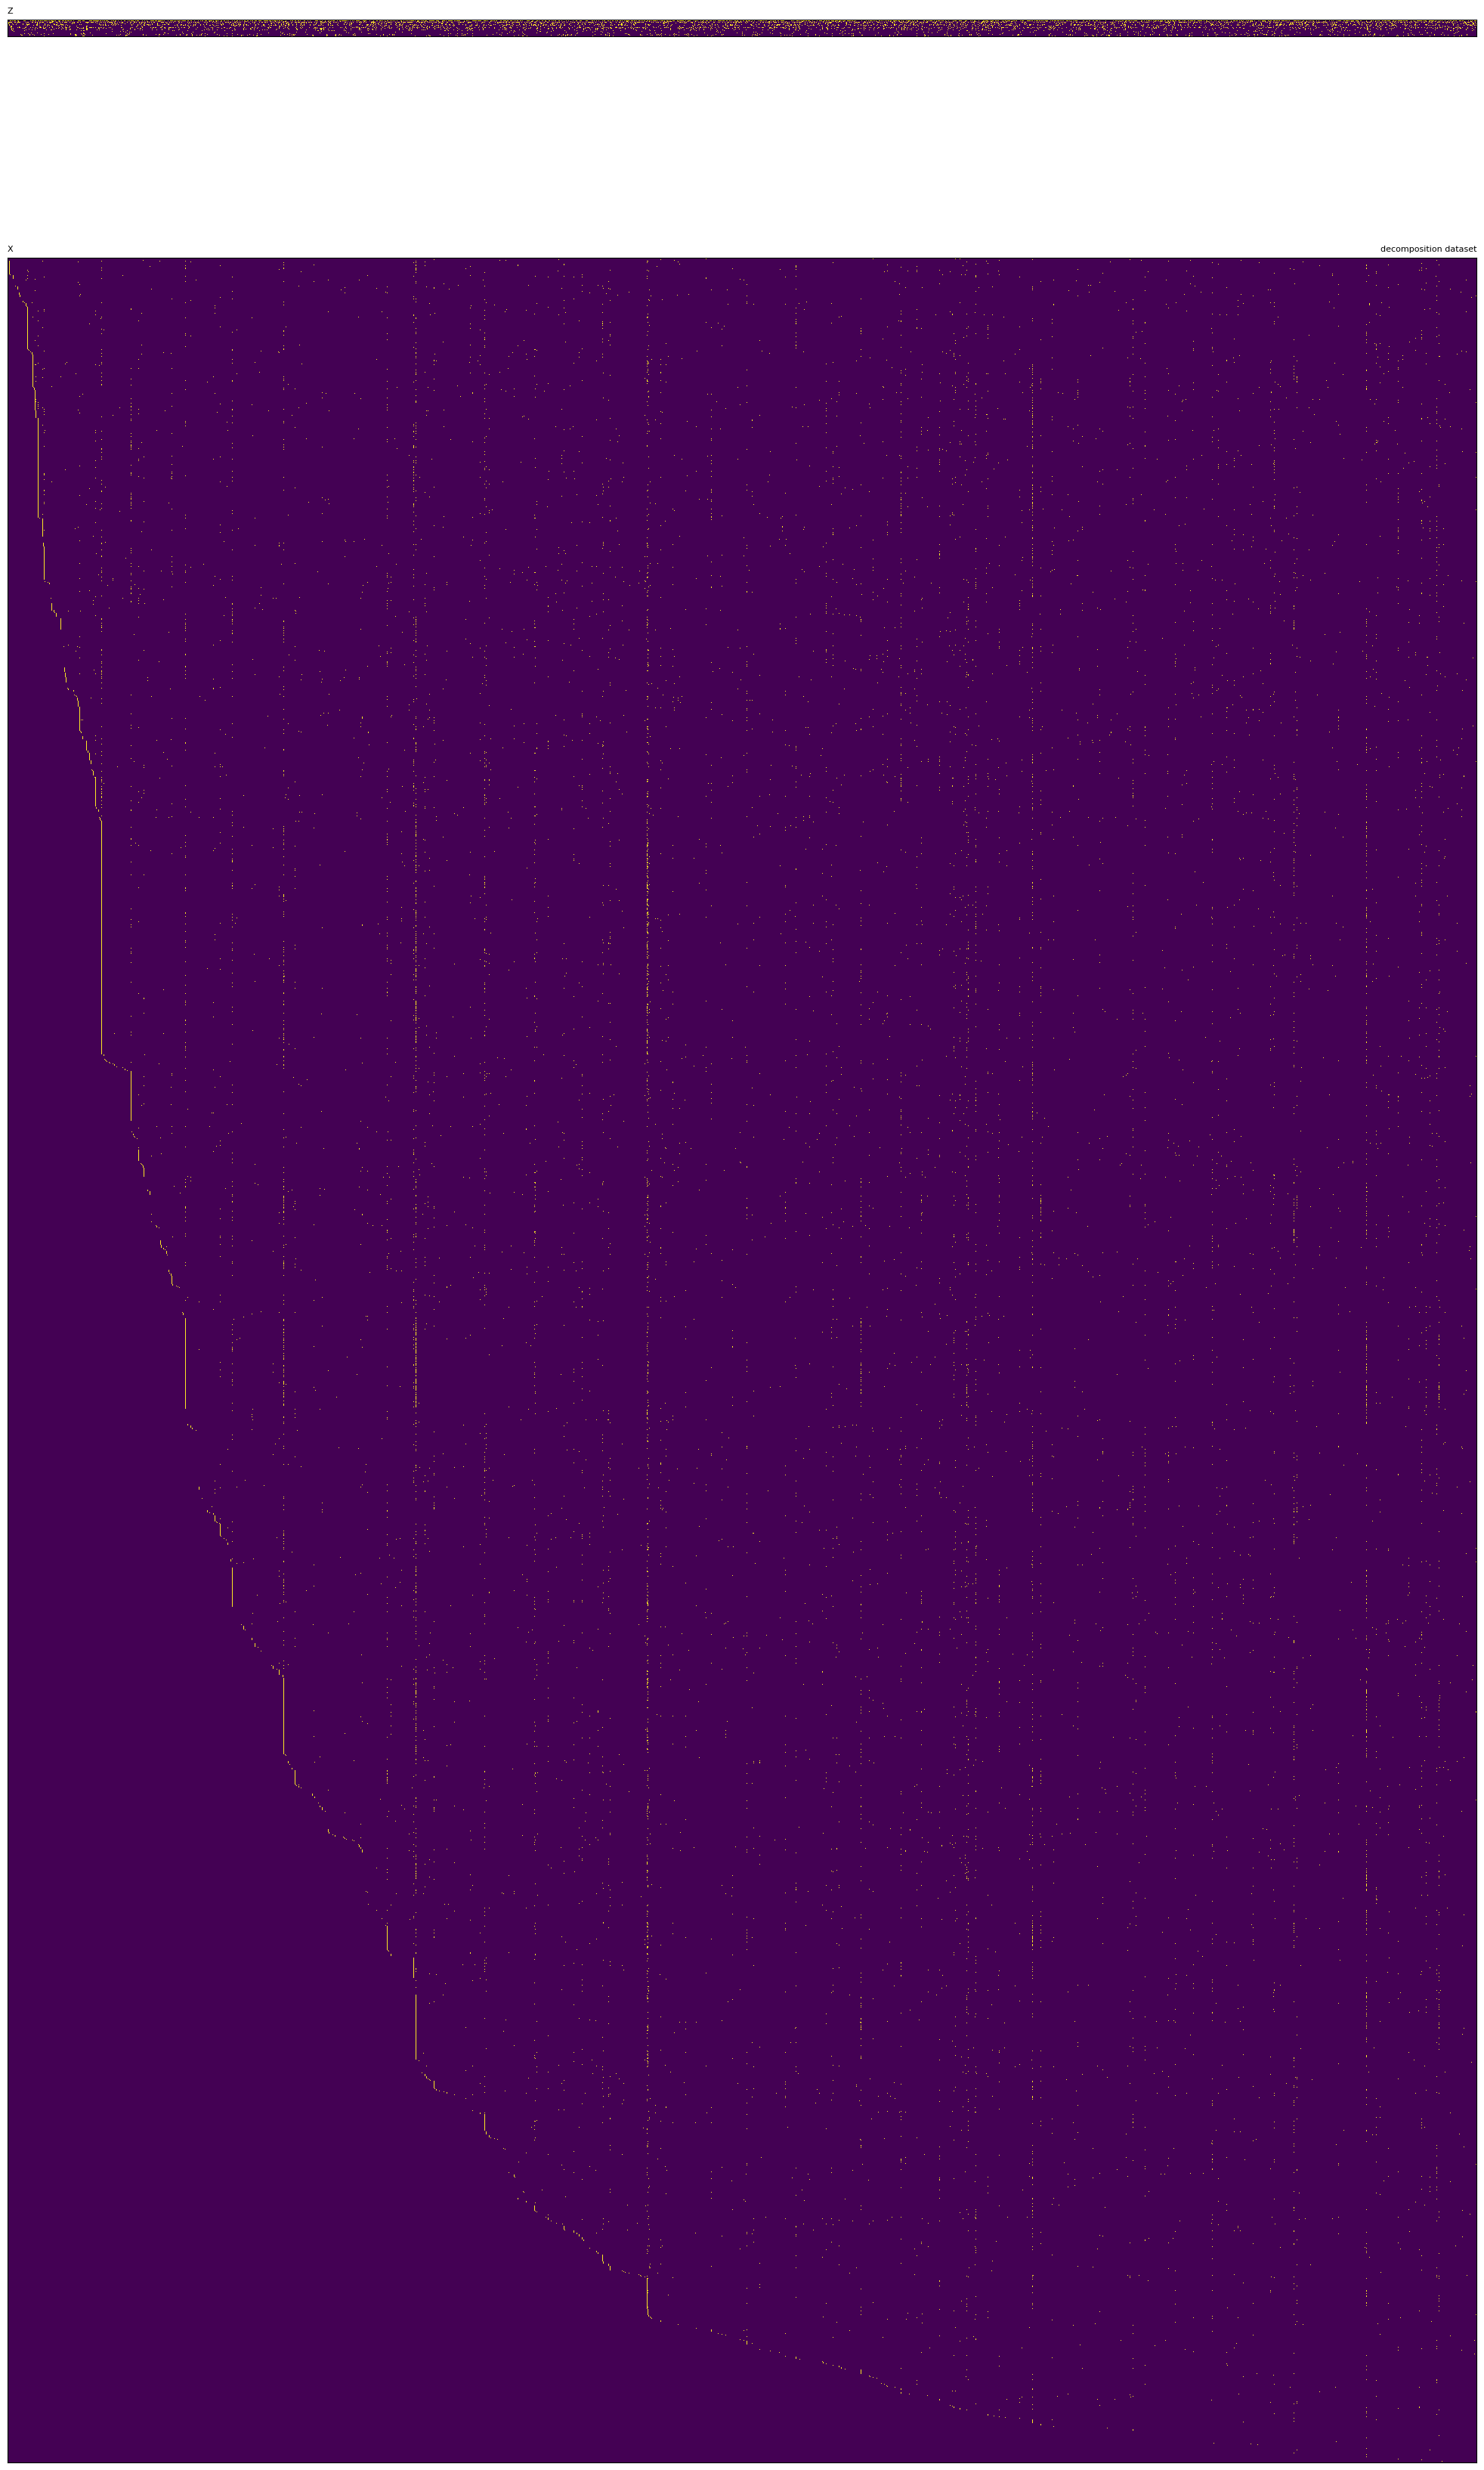

In [9]:
# dataset for decomposition tasks
ds = Dataset()
ds.load_data(X=X_data)
ds.load_data(X=Z_data)

ds.summarize(title='decomposition dataset', display=True, pixels=2, ordered=True)

In [17]:
# dataset for prediction tasks

X_data.split(test_size=0.2, val_size=0.2)
X_data.negative_sample(train_size=X_data.pos_train_size, 
                       val_size=X_data.pos_val_size, 
                       test_size=X_data.pos_test_size, 
                       seed=9999, type='popularity')

ds_train = Dataset()
ds_train.load_data(X=X_data.train_data, U=X_data.U, V=X_data.V)
ds_train.load_data(X=Z_data, U=Z_data.U, V=Z_data.V)

ds_val = Dataset()
ds_val.load_data(X=X_data.val_data, U=X_data.U, V=X_data.V)
ds_val.load_data(X=Z_data, U=Z_data.U, V=Z_data.V)

ds_test = Dataset()
ds_test.load_data(X=X_data.test_data, U=X_data.U, V=X_data.V)
ds_test.load_data(X=Z_data, U=Z_data.U, V=Z_data.V)

[I] split settings
[I]   train_size   : 8856
[I]   val_size     : 2952
[I]   test_size    : 2952
[I]   seed         : 9999
[I] dataset seed : 9999
[I] negative sampling settings
[I]   n_negatives  : 14760
[I]   train_size   : 8856
[I]   val_size     : 2952
[I]   test_size    : 2952
[I]   seed         : 9999


[I] Mean num of Vs per U in X: 3.0
[I] Mean num of Us per V in X: 4.4
[I] Median num of Vs per U in X: 3.0
[I] Median num of Us per V in X: 0.0
[I] Mean num of Vs per W in Z: 244.4
[I] Mean num of Ws per V in Z: 2.7
[I] Median num of Vs per W in Z: 171.0
[I] Median num of Ws per V in Z: 3.0


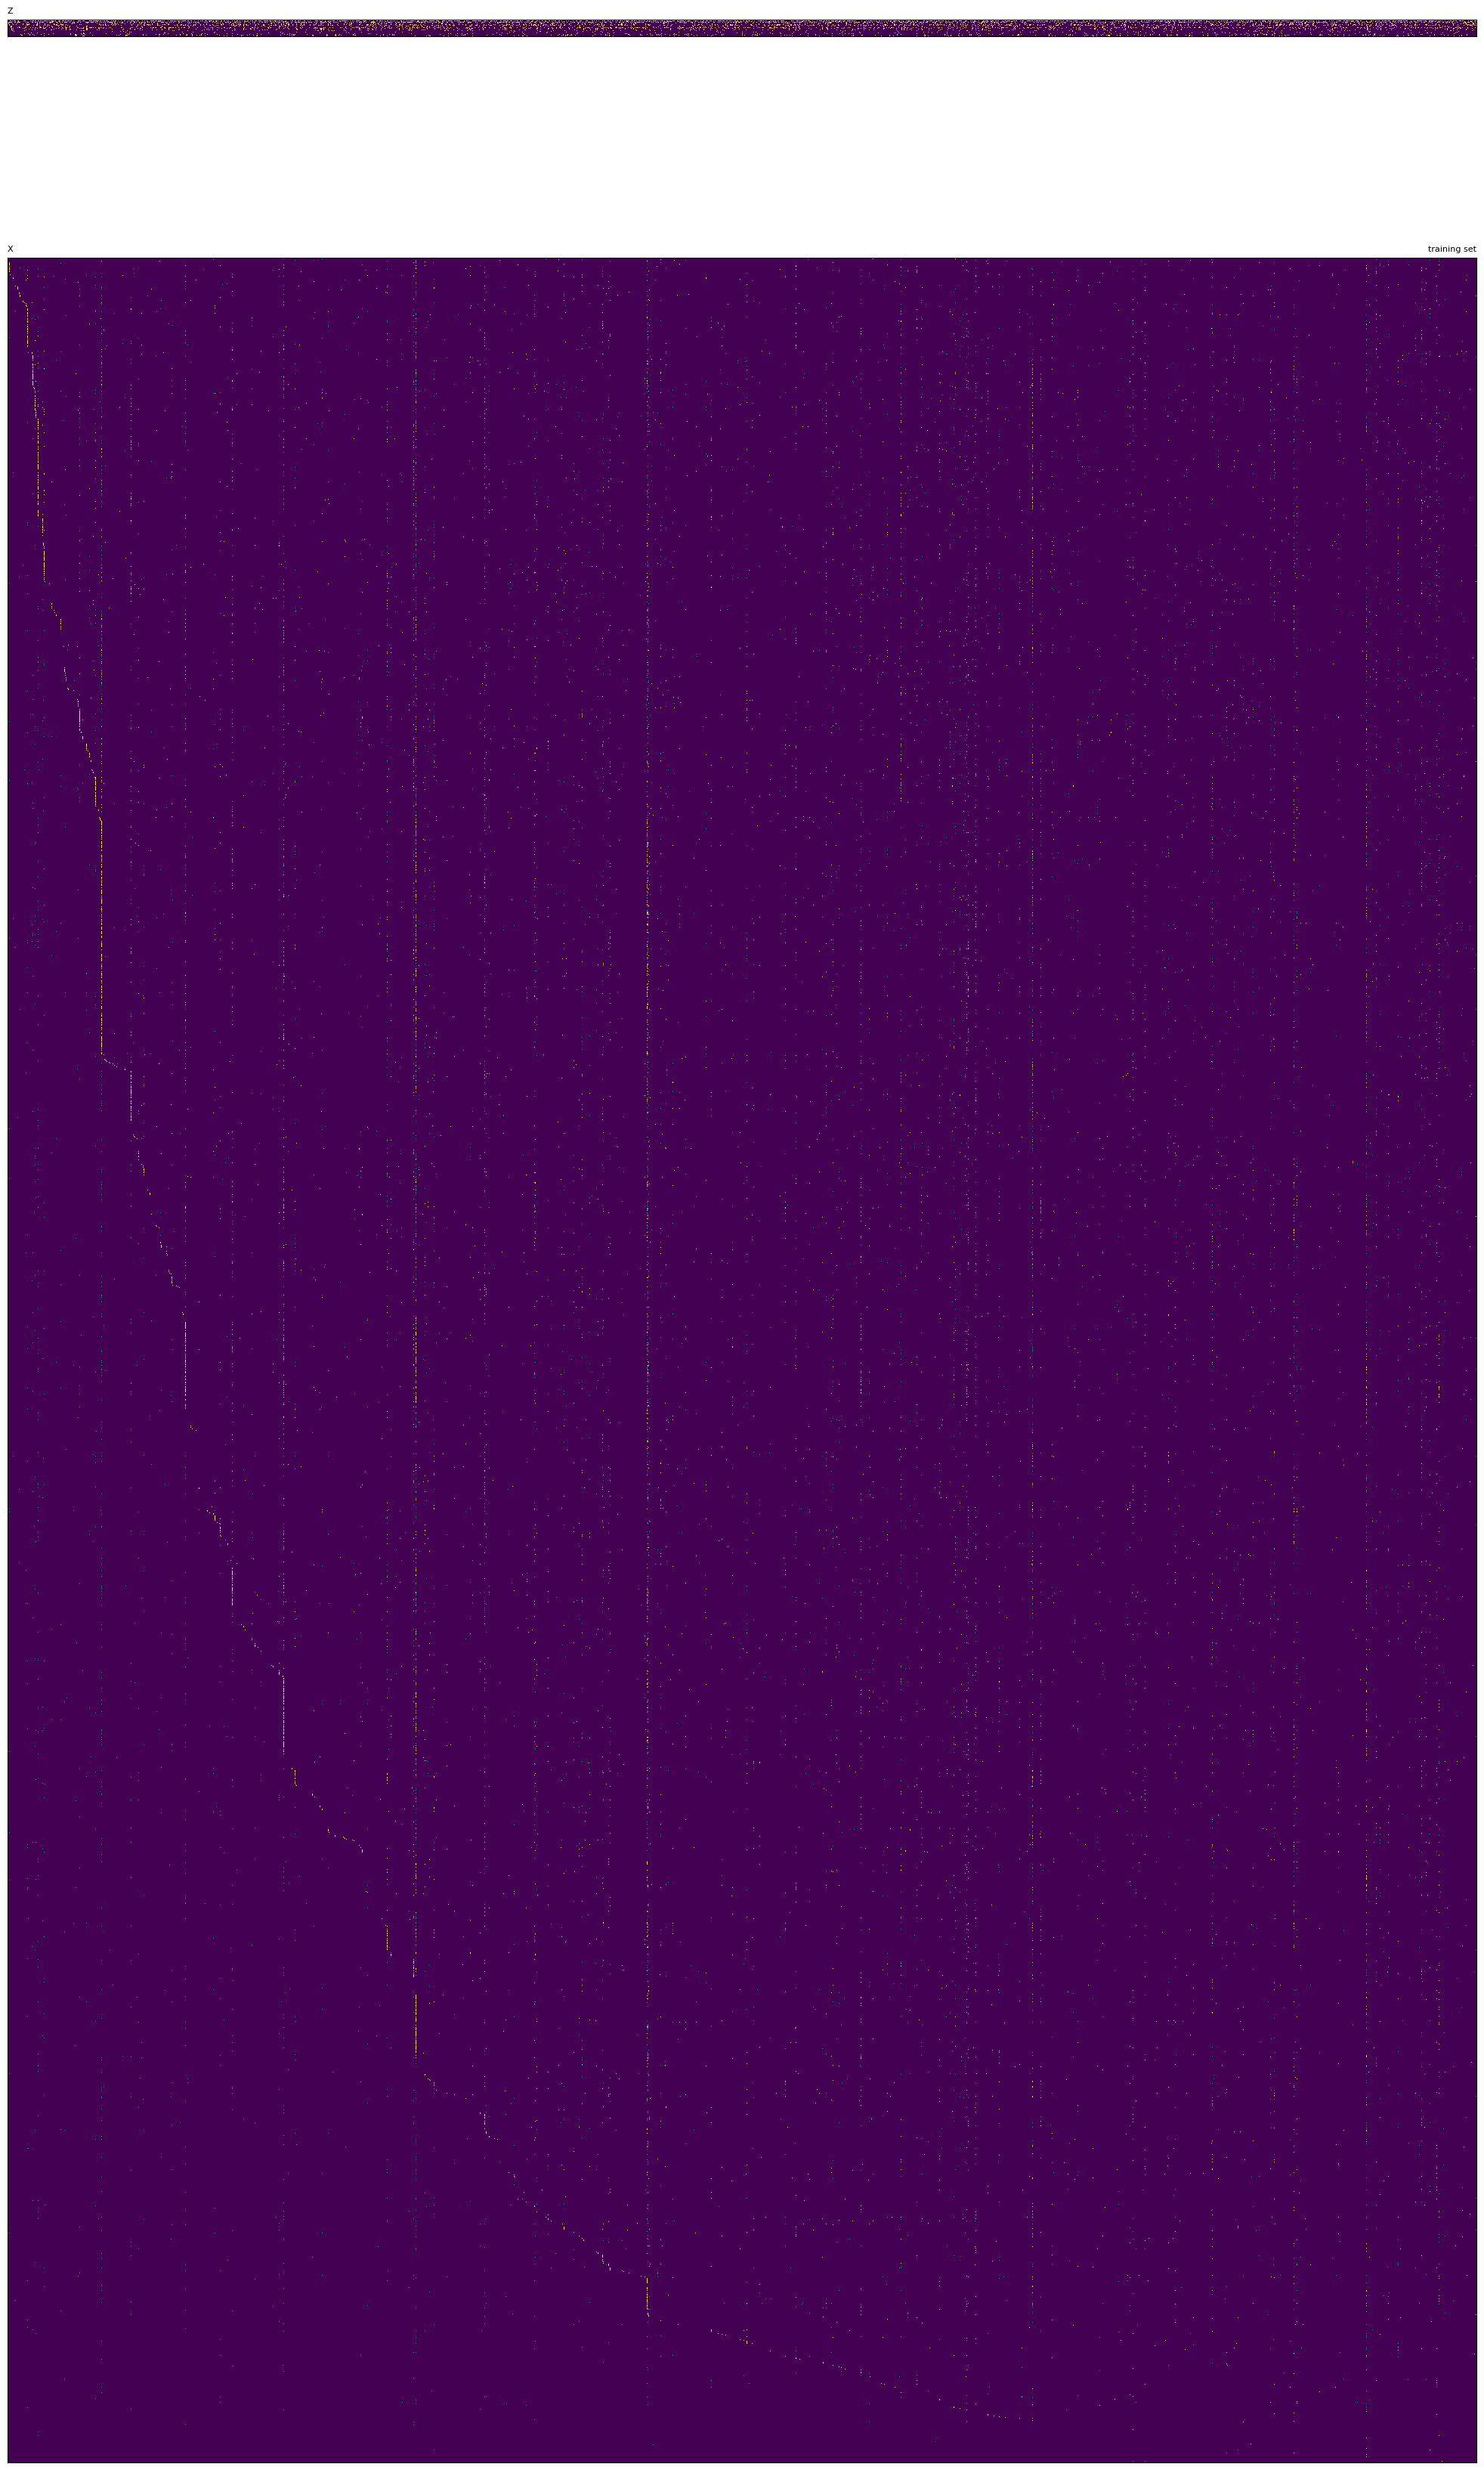

In [18]:
ds_train.summarize(title='training set', display=True, pixels=2, ordered=True)

[I] dataset seed : 1997
[I] cross validation settings
[I]   partition    : [0, 2362, 4724, 7086, 9447, 11808]
[I]   test_size    : 0.2
[I]   seed         : 1997
[I] cv_get_indices info
[I]   current fold         : 1
[I]   current train size   : 9446
[I]   current val size     : 2362
[I] dataset seed : 6666
[I] cv negative sampling settings
[I]   n_negatives  : 14760
[I]   test_size    : 2952
[I]   seed         : 6666
[I] cv_get_indices info
[I]   current fold         : 1
[I]   current train size   : 9446
[I]   current val size     : 2362


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


[I] Mean num of Vs per U in X: 3.1
[I] Mean num of Us per V in X: 4.7
[I] Median num of Vs per U in X: 3.0
[I] Median num of Us per V in X: 0.0
[I] Mean num of Vs per W in Z: 244.4
[I] Mean num of Ws per V in Z: 2.7
[I] Median num of Vs per W in Z: 171.0
[I] Median num of Ws per V in Z: 3.0


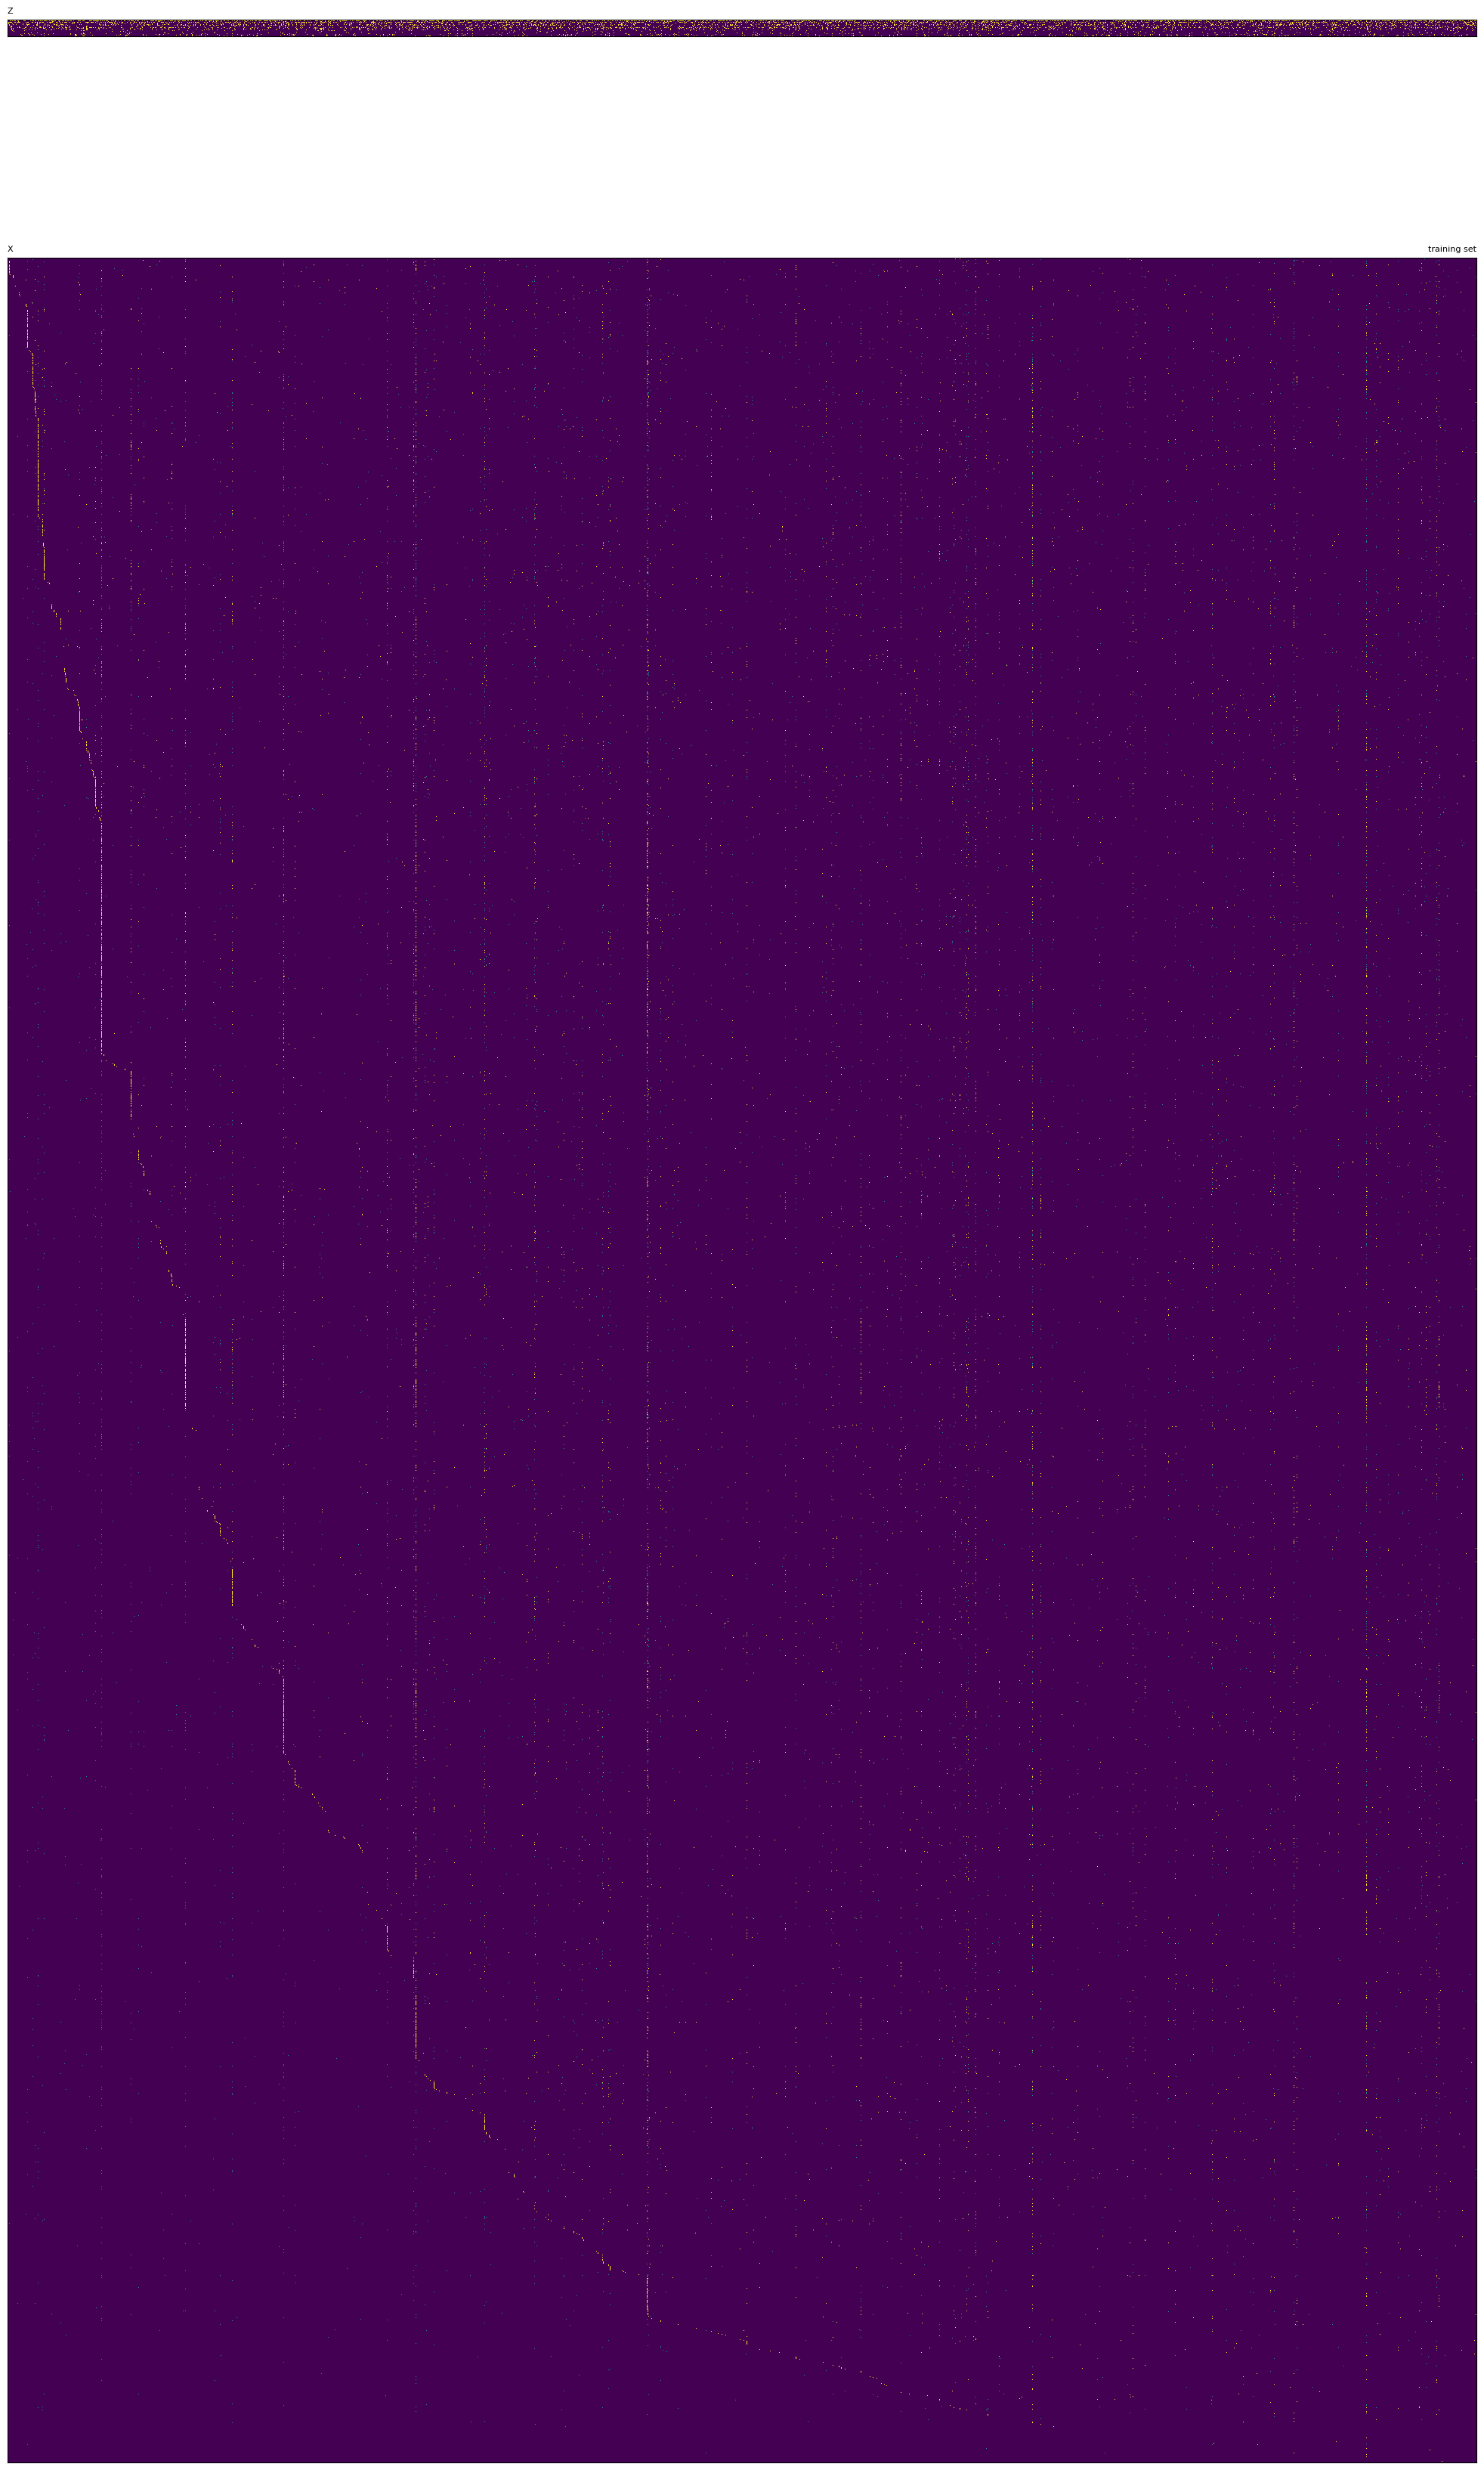

[I] Re-using original config, seed will be ignored.
[I] cv_get_indices info
[I]   current fold         : 2
[I]   current train size   : 9446
[I]   current val size     : 2362
[I] Re-using original config, seed will be ignored.
[I] cv_get_indices info
[I]   current fold         : 2
[I]   current train size   : 9446
[I]   current val size     : 2362
[I] Mean num of Vs per U in X: 3.1
[I] Mean num of Us per V in X: 4.7
[I] Median num of Vs per U in X: 3.0
[I] Median num of Us per V in X: 1.0
[I] Mean num of Vs per W in Z: 244.4
[I] Mean num of Ws per V in Z: 2.7
[I] Median num of Vs per W in Z: 171.0
[I] Median num of Ws per V in Z: 3.0


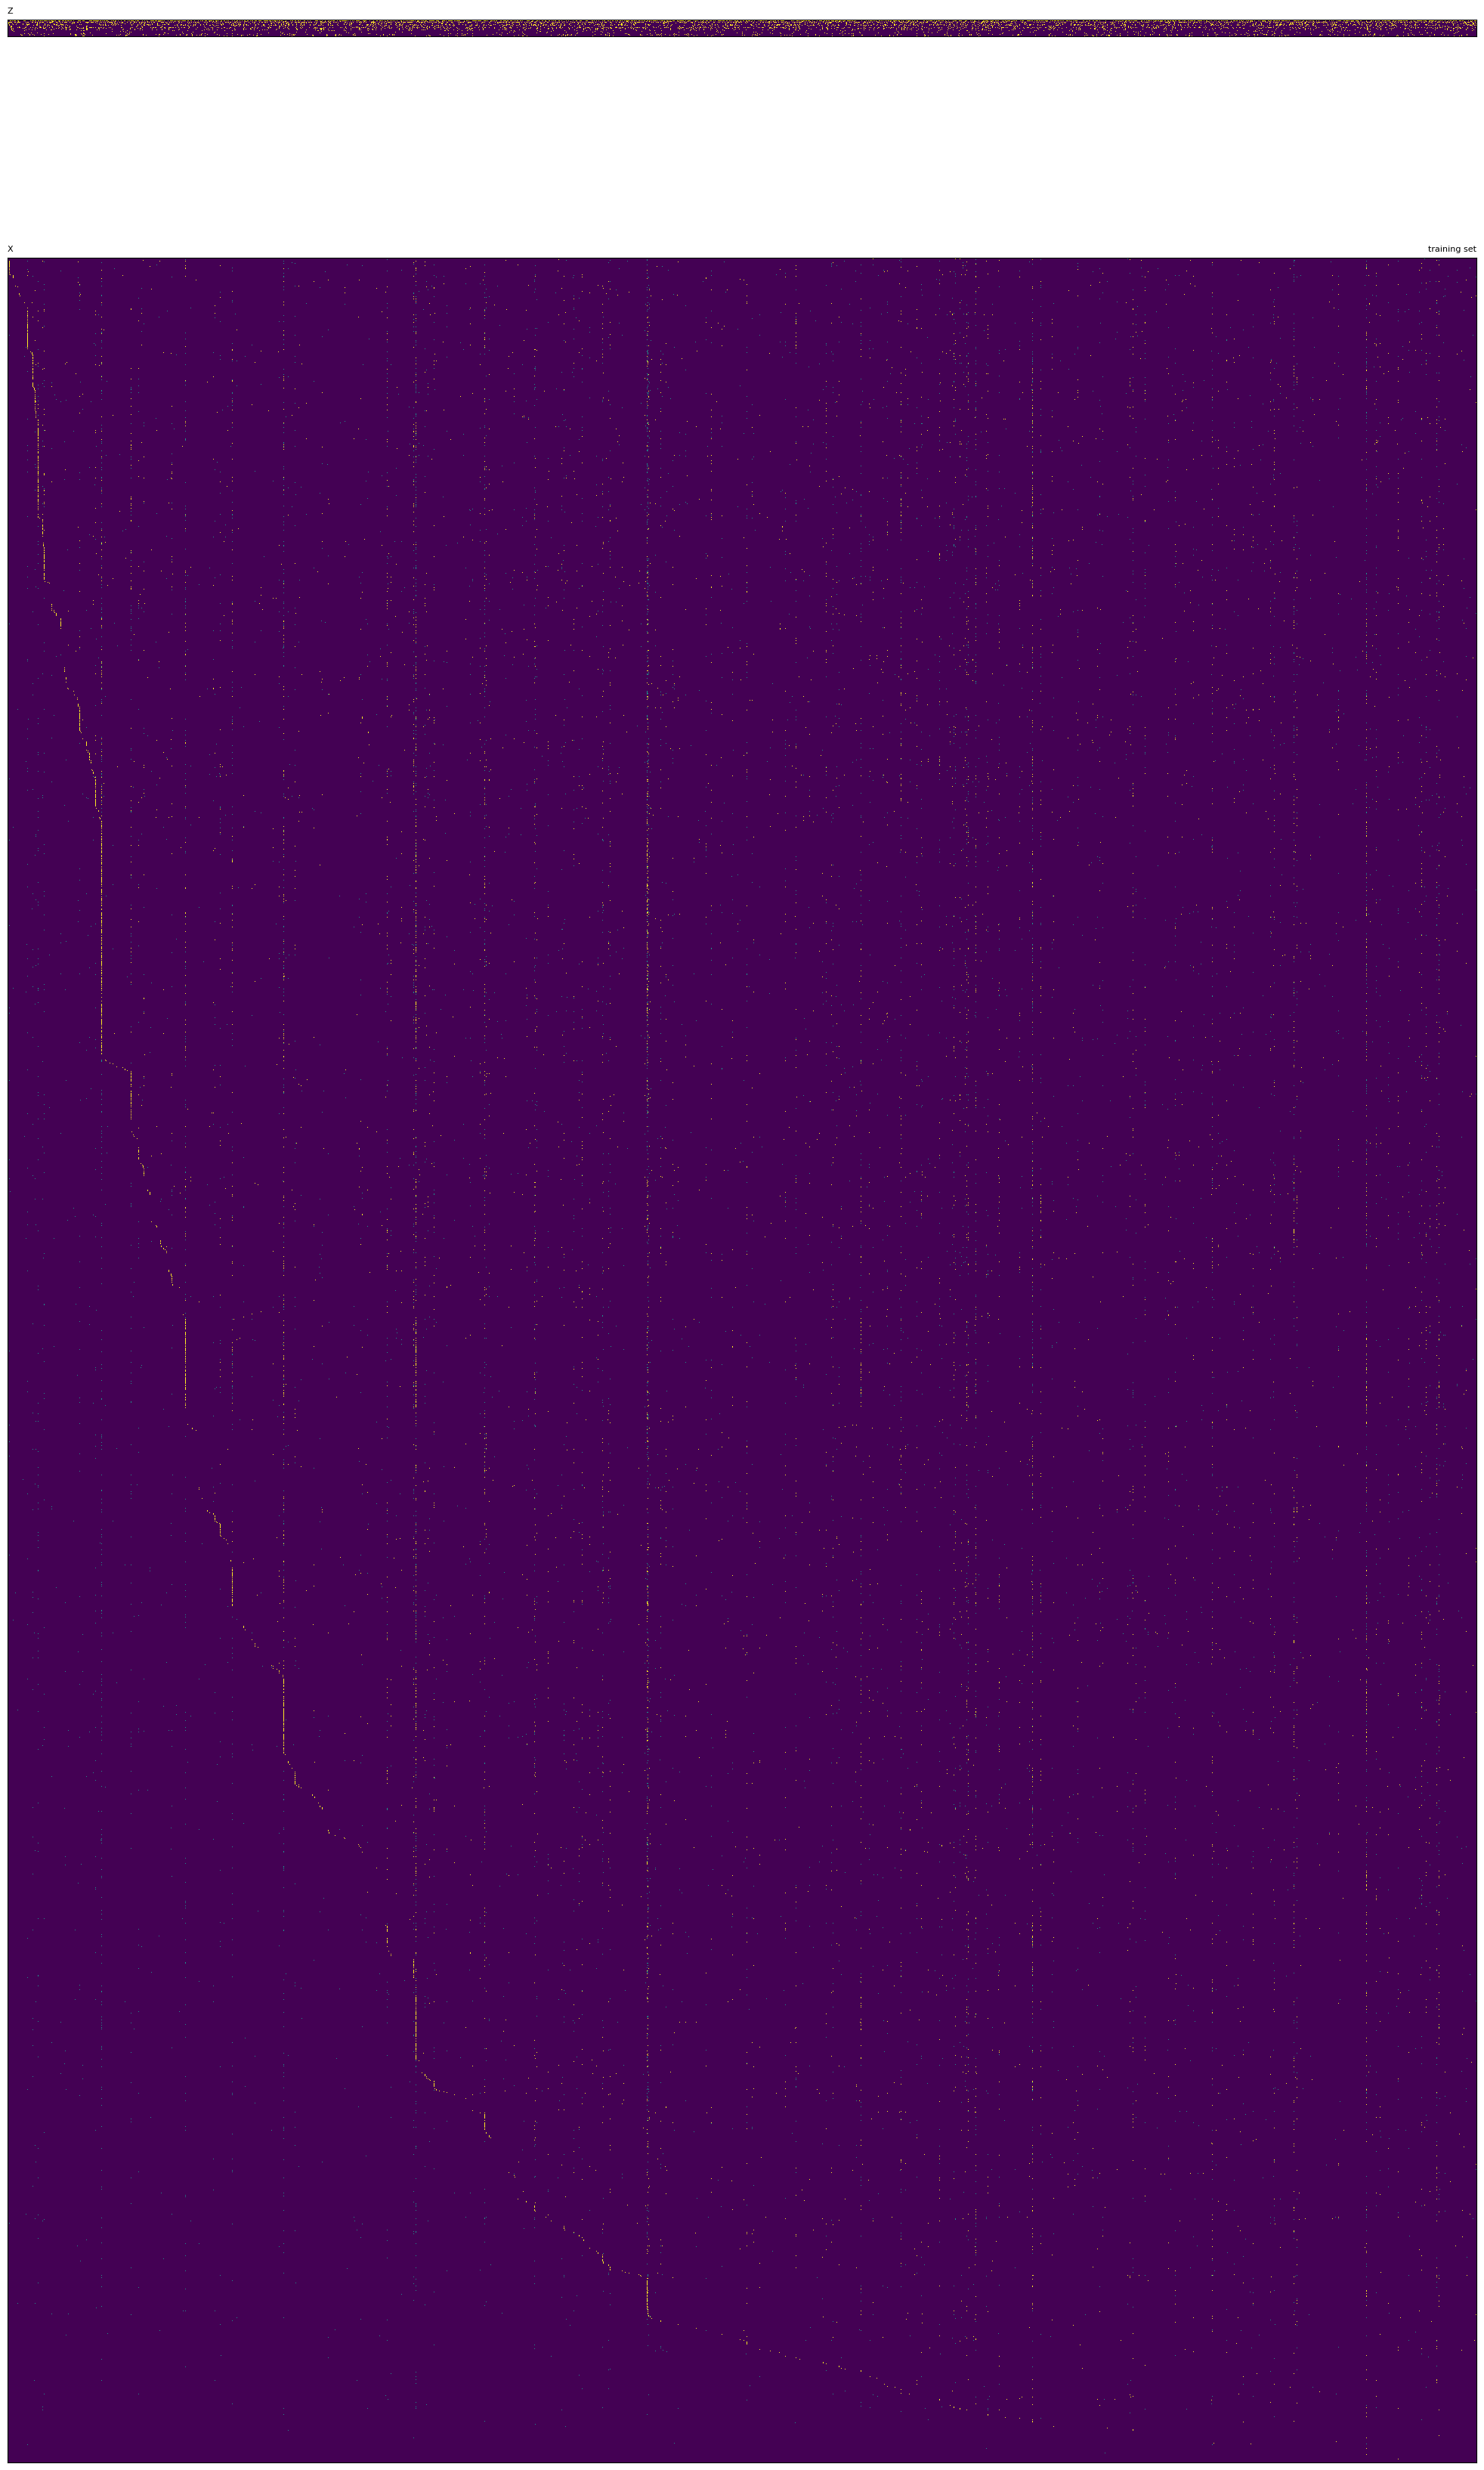

[I] Re-using original config, seed will be ignored.
[I] cv_get_indices info
[I]   current fold         : 3
[I]   current train size   : 9446
[I]   current val size     : 2362
[I] Re-using original config, seed will be ignored.
[I] cv_get_indices info
[I]   current fold         : 3
[I]   current train size   : 9446
[I]   current val size     : 2362
[I] Mean num of Vs per U in X: 3.1
[I] Mean num of Us per V in X: 4.7
[I] Median num of Vs per U in X: 3.0
[I] Median num of Us per V in X: 0.0
[I] Mean num of Vs per W in Z: 244.4
[I] Mean num of Ws per V in Z: 2.7
[I] Median num of Vs per W in Z: 171.0
[I] Median num of Ws per V in Z: 3.0


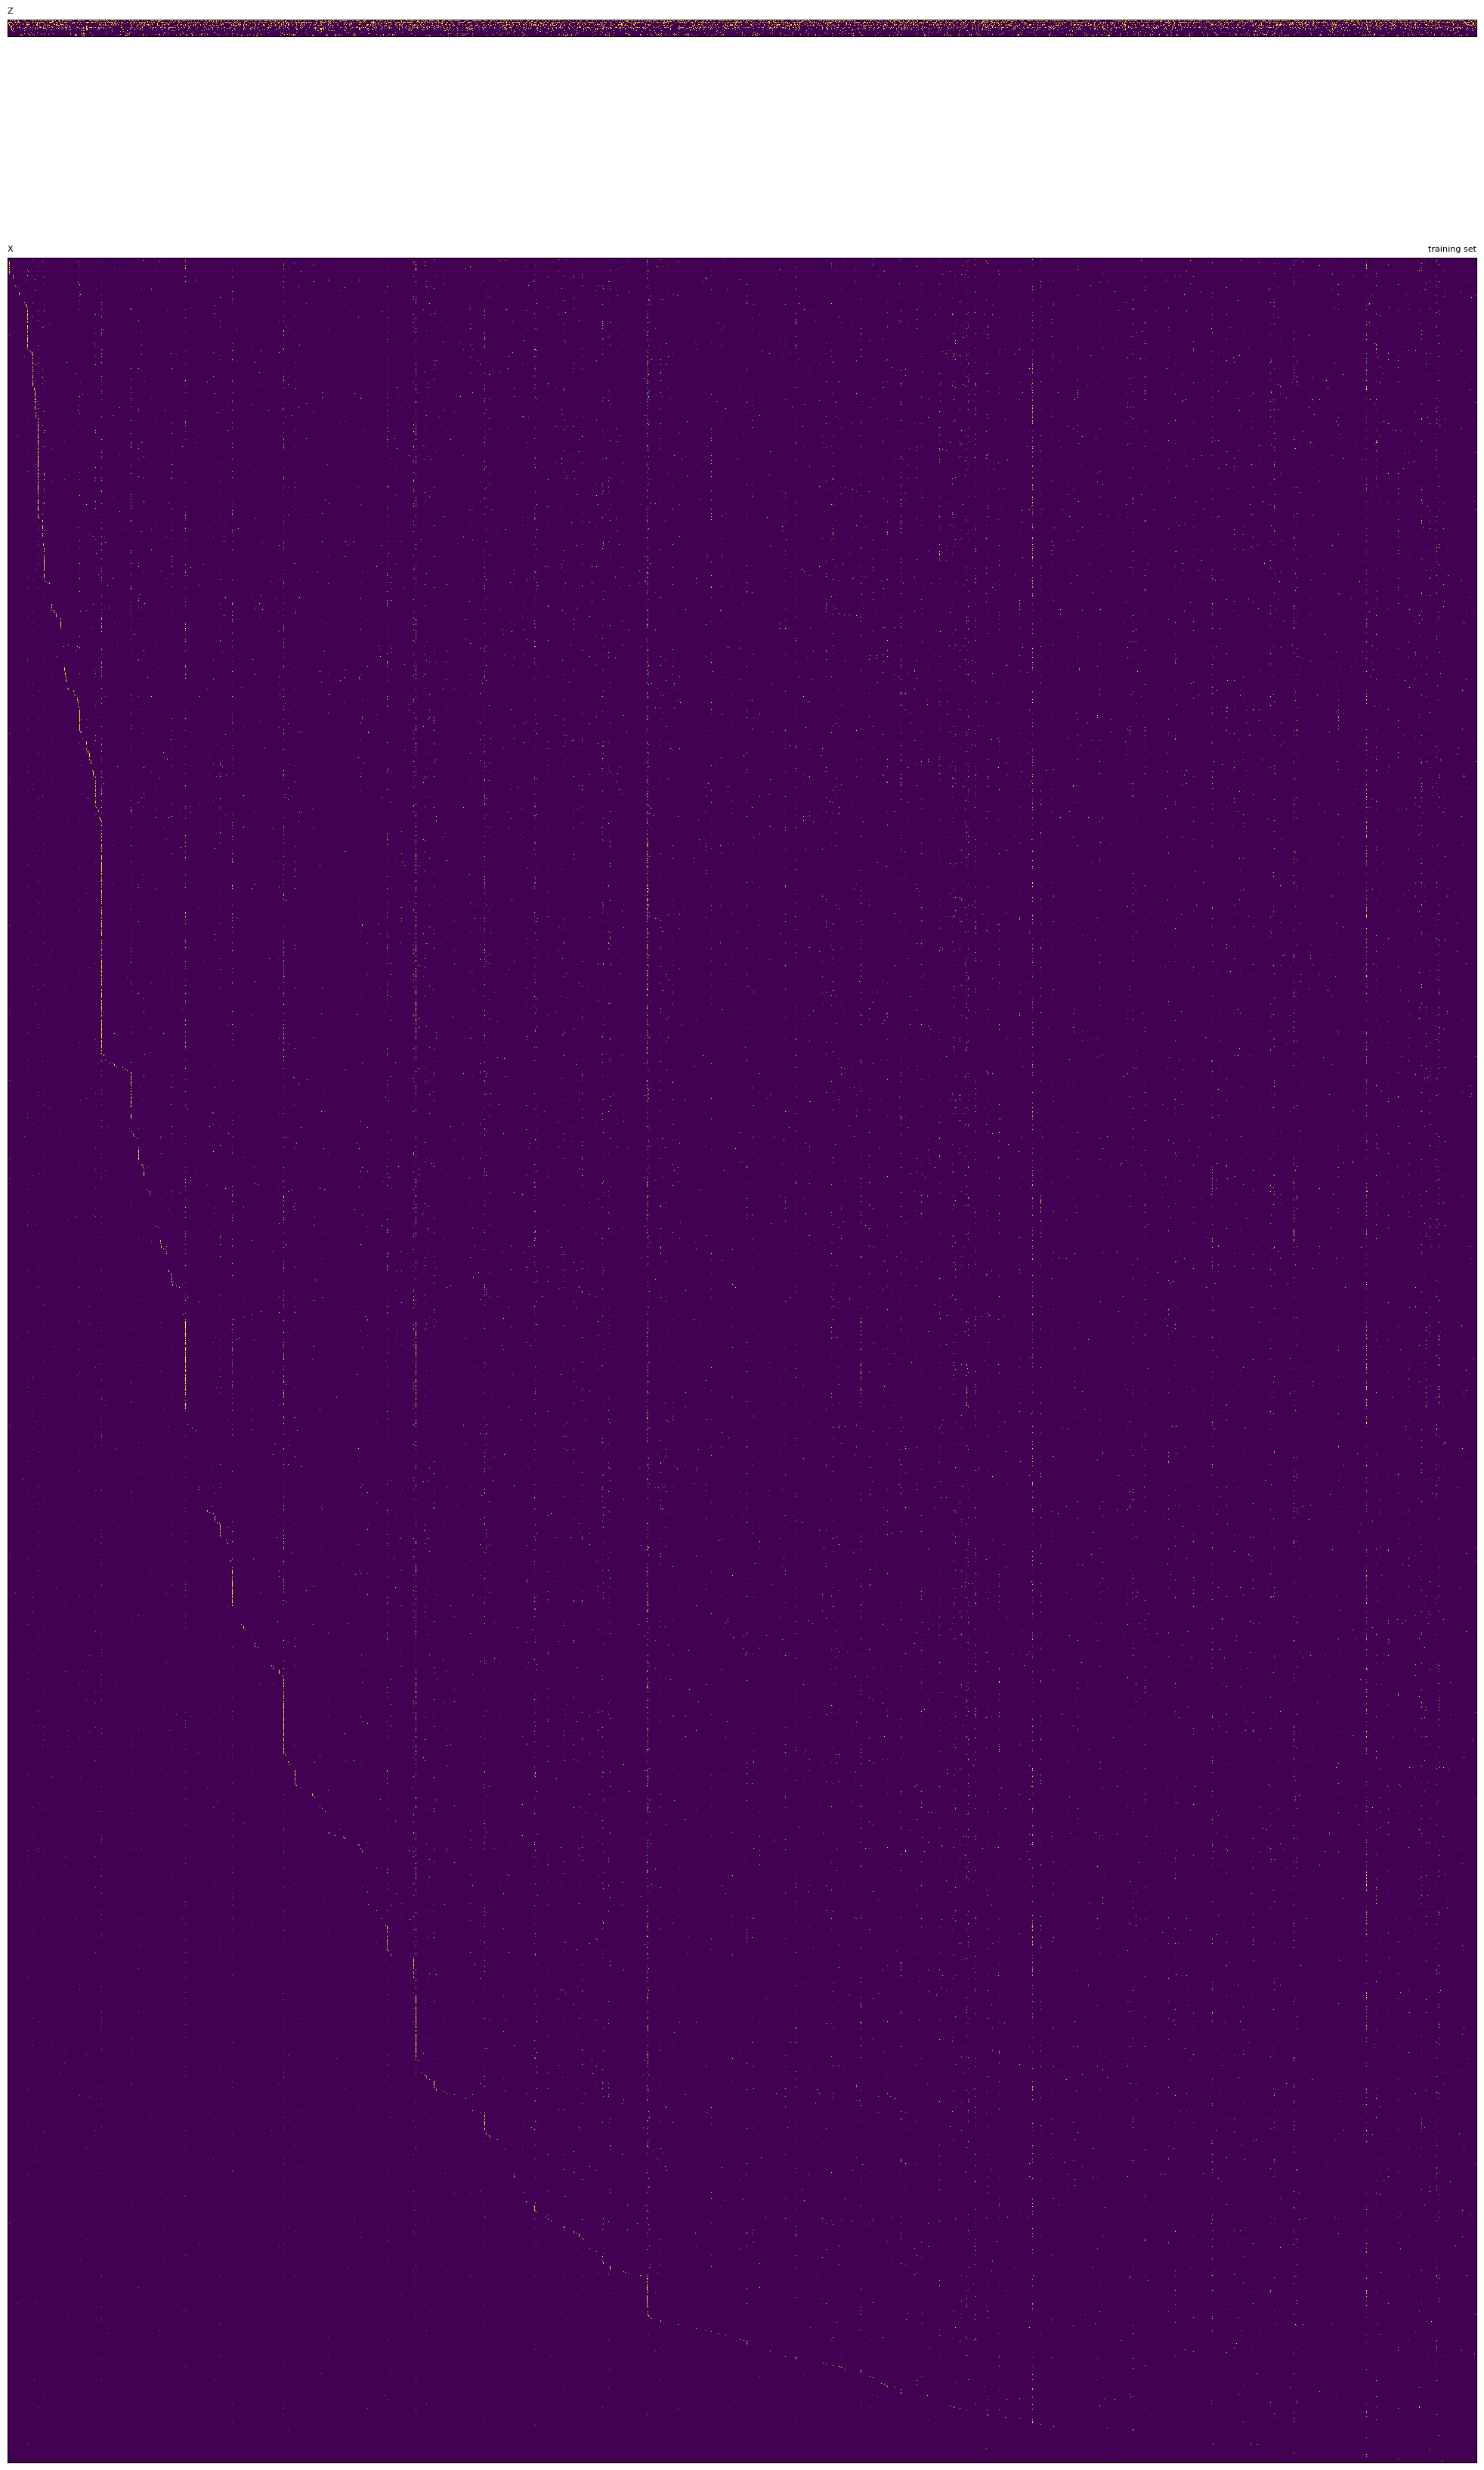

[I] Re-using original config, seed will be ignored.
[I] cv_get_indices info
[I]   current fold         : 4
[I]   current train size   : 9447
[I]   current val size     : 2361
[I] Re-using original config, seed will be ignored.
[I] cv_get_indices info
[I]   current fold         : 4
[I]   current train size   : 9447
[I]   current val size     : 2361
[I] Mean num of Vs per U in X: 3.1
[I] Mean num of Us per V in X: 4.7
[I] Median num of Vs per U in X: 3.0
[I] Median num of Us per V in X: 0.0
[I] Mean num of Vs per W in Z: 244.4
[I] Mean num of Ws per V in Z: 2.7
[I] Median num of Vs per W in Z: 171.0
[I] Median num of Ws per V in Z: 3.0


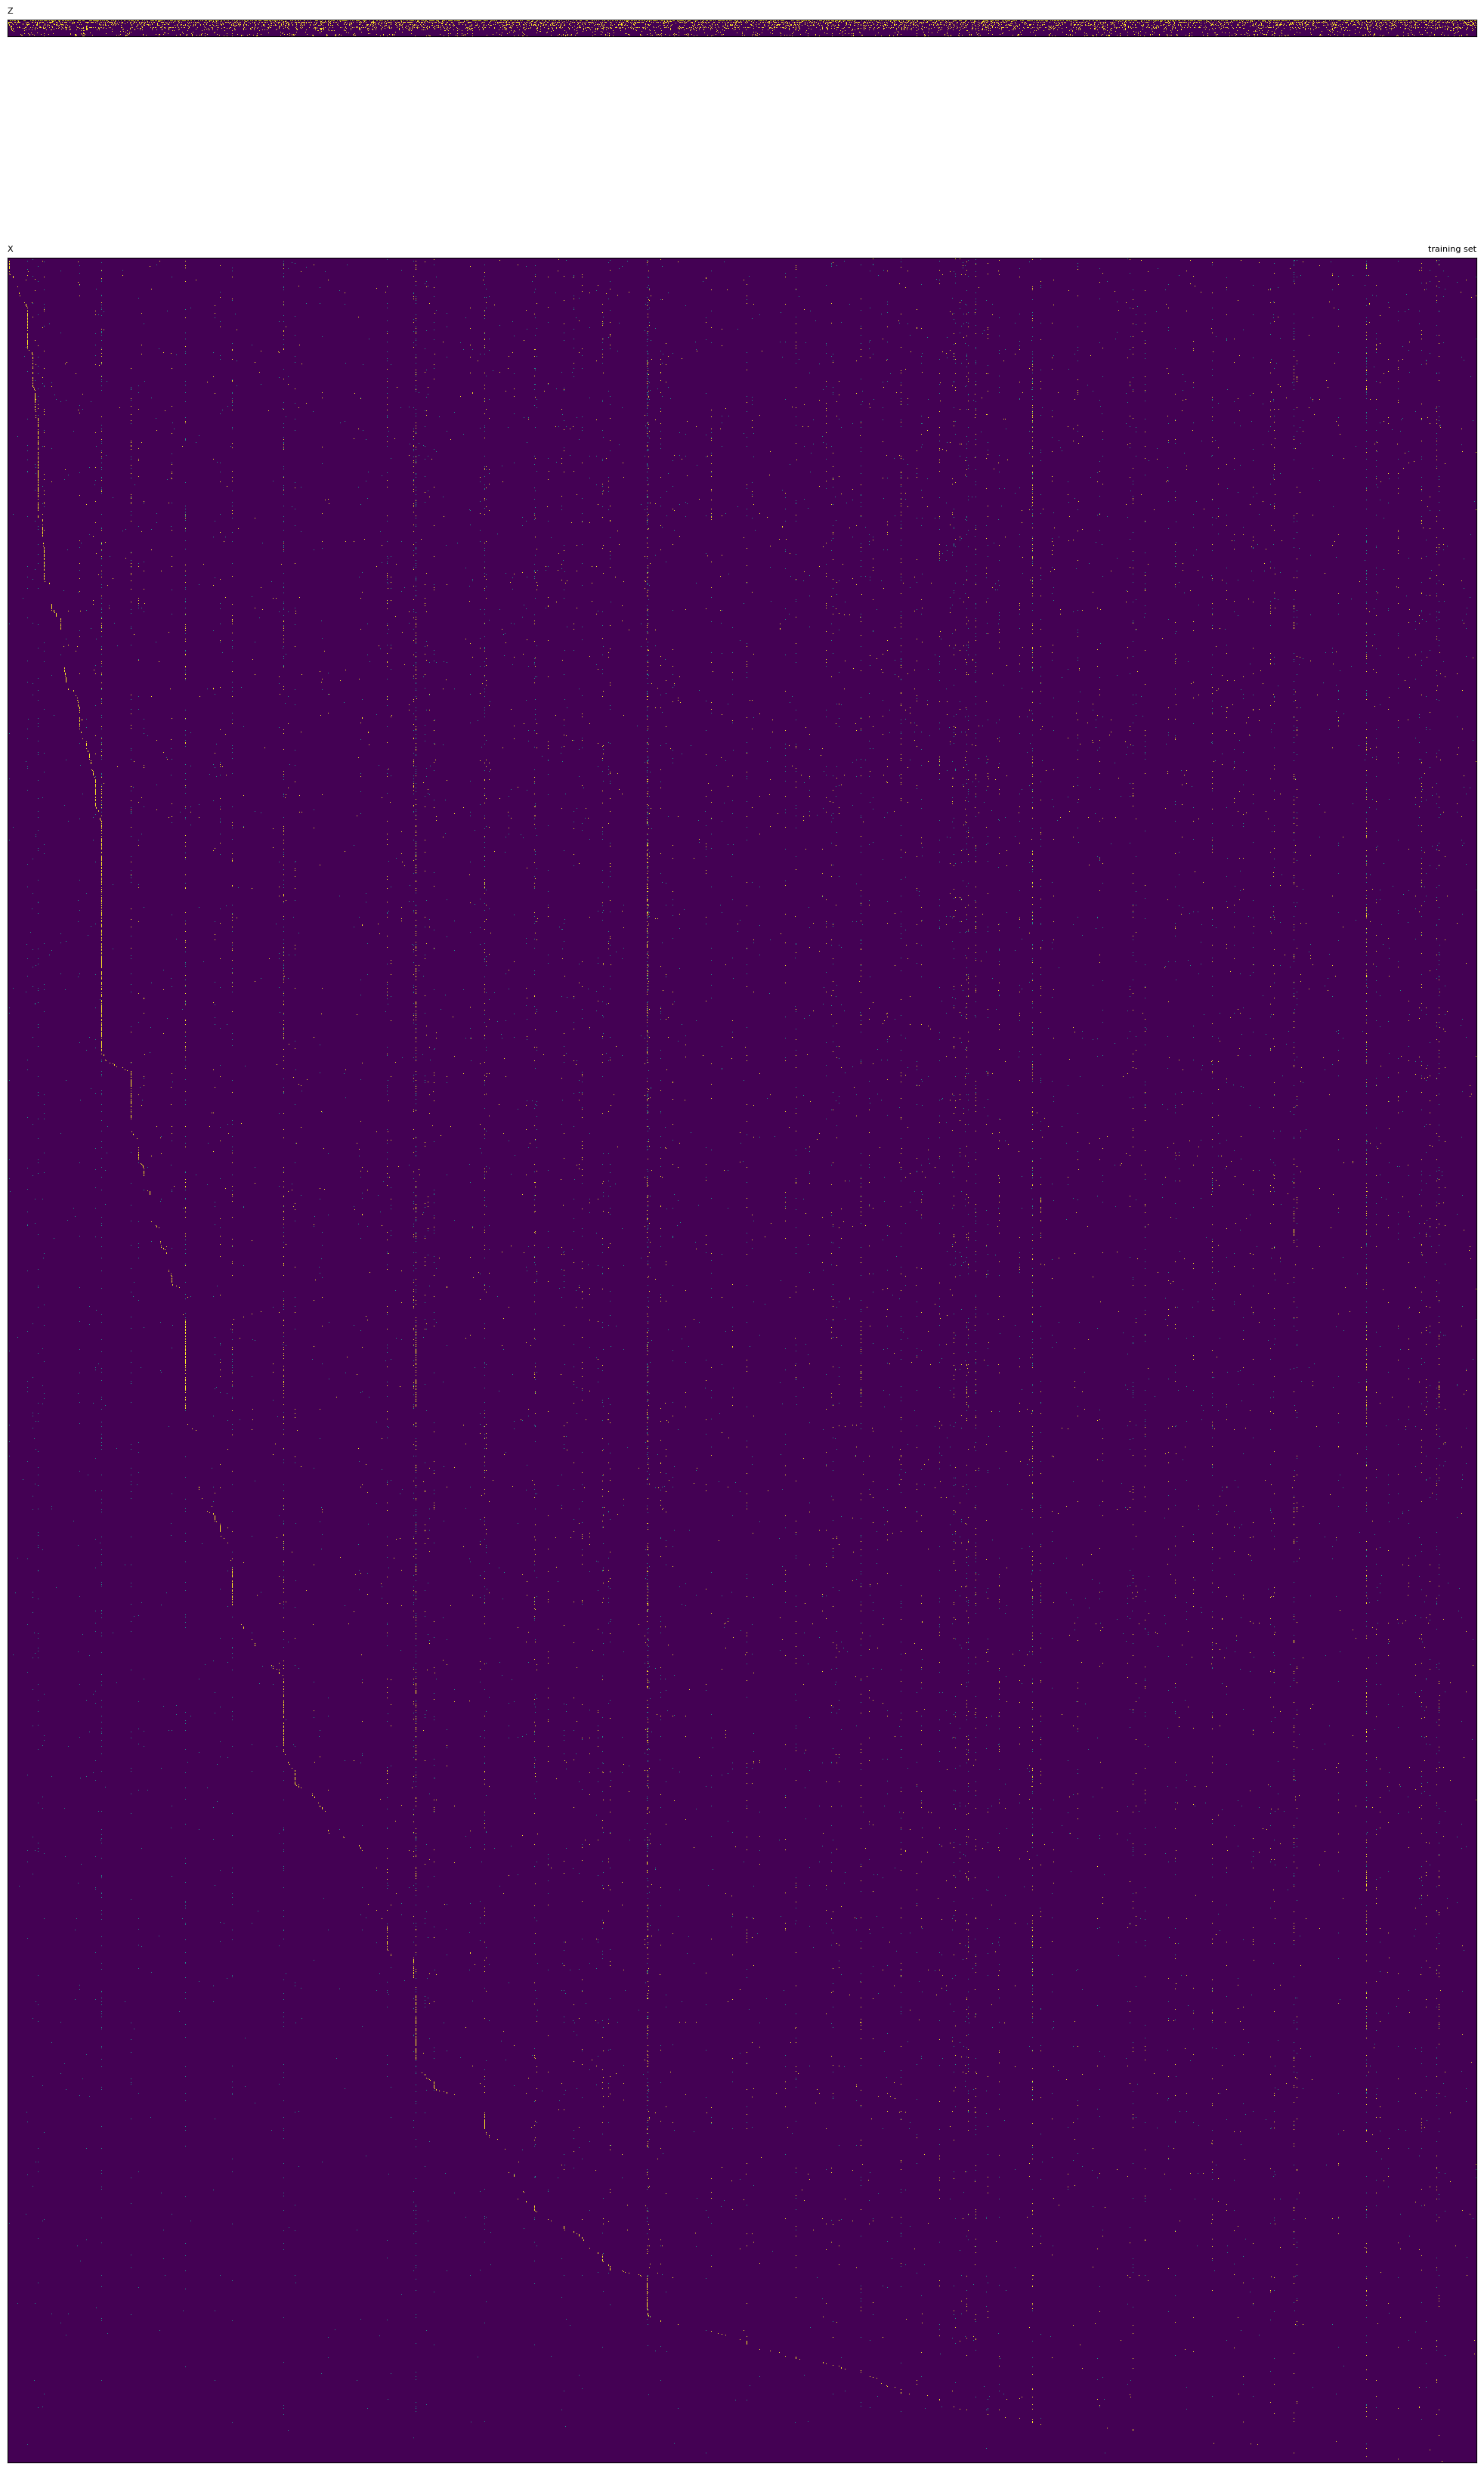

[I] Re-using original config, seed will be ignored.
[I] cv_get_indices info
[I]   current fold         : 5
[I]   current train size   : 9447
[I]   current val size     : 2361
[I] Re-using original config, seed will be ignored.
[I] cv_get_indices info
[I]   current fold         : 5
[I]   current train size   : 9447
[I]   current val size     : 2361
[I] Mean num of Vs per U in X: 3.1
[I] Mean num of Us per V in X: 4.7
[I] Median num of Vs per U in X: 3.0
[I] Median num of Us per V in X: 1.0
[I] Mean num of Vs per W in Z: 244.4
[I] Mean num of Ws per V in Z: 2.7
[I] Median num of Vs per W in Z: 171.0
[I] Median num of Ws per V in Z: 3.0


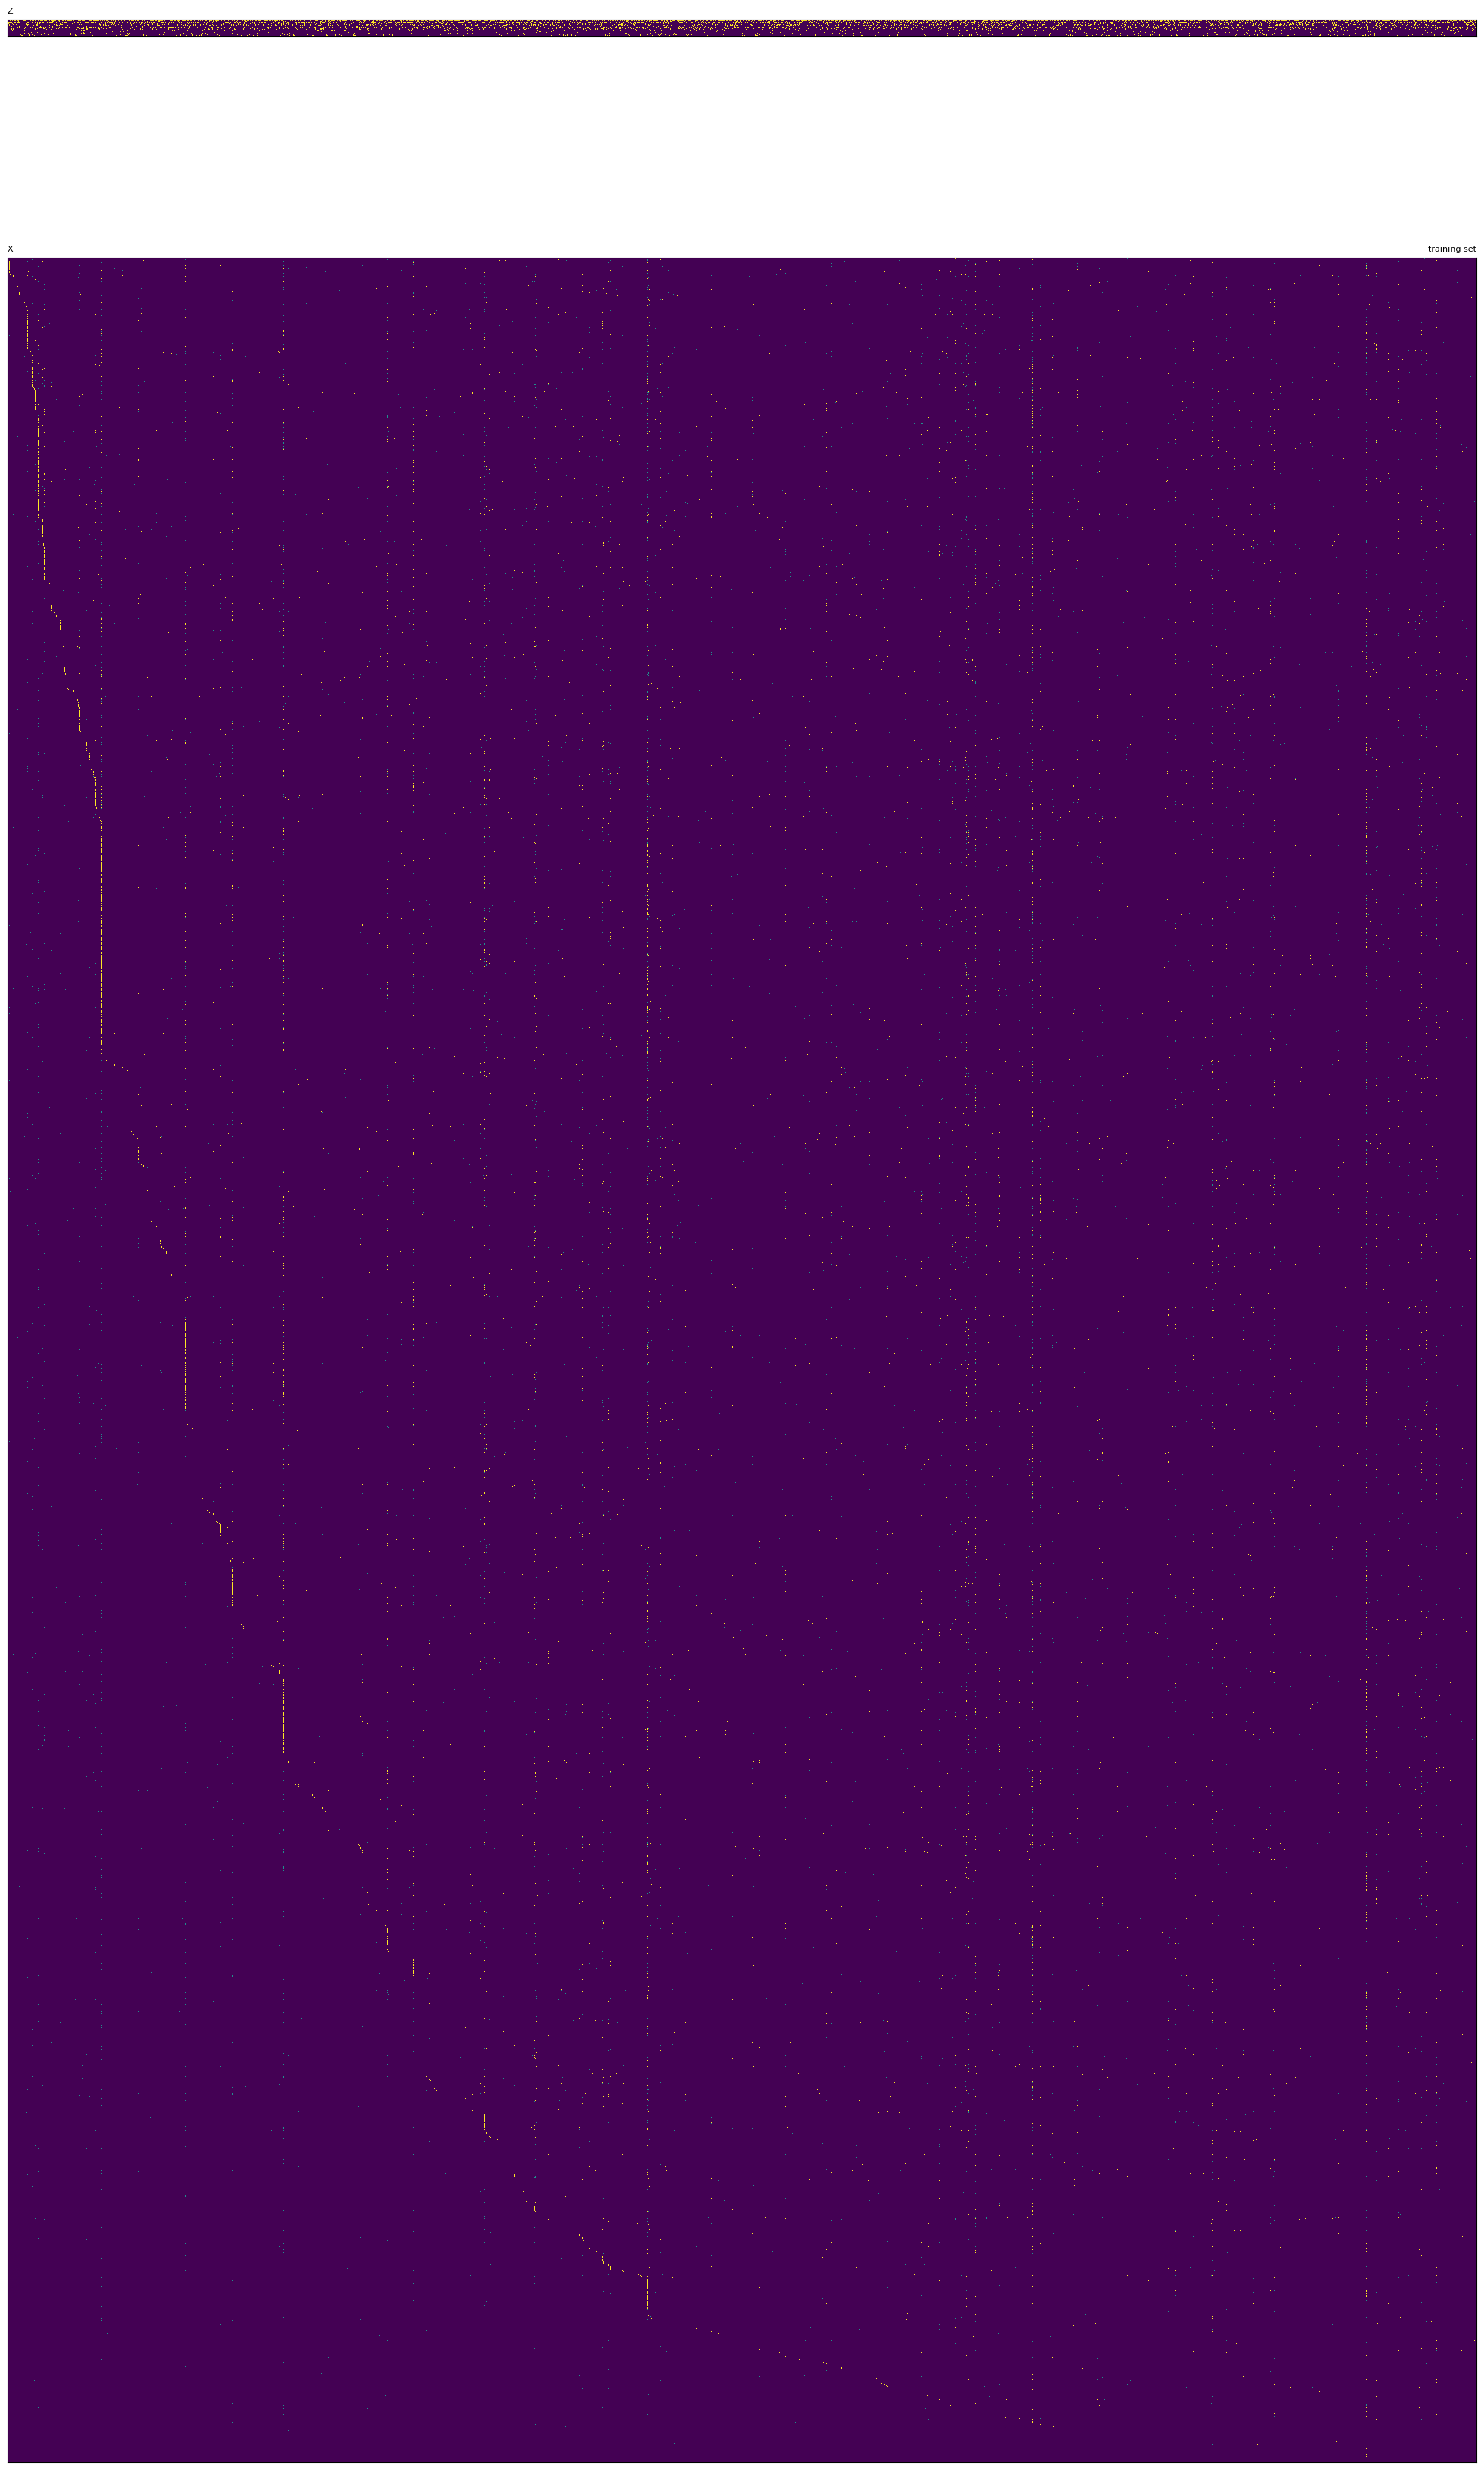

In [19]:
n_fold = 5

for i in range(n_fold):
    fold = i + 1
    train_val_size = X_data.pos_train_size + X_data.pos_val_size

    X_data.cross_validation(test_size=0.2, n_folds=5, current_fold=fold, seed=1997)
    X_data.cv_negative_sample(n_folds=n_fold,
                              current_fold=fold,
                              train_val_size=train_val_size, 
                              test_size=X_data.pos_test_size, 
                              seed=6666, type='popularity')

    ds_train = Dataset()
    ds_train.load_data(X=X_data.train_data, U=X_data.U, V=X_data.V)
    ds_train.load_data(X=Z_data, U=Z_data.U, V=Z_data.V)

    ds_val = Dataset()
    ds_val.load_data(X=X_data.val_data, U=X_data.U, V=X_data.V)
    ds_val.load_data(X=Z_data, U=Z_data.U, V=Z_data.V)

    ds_test = Dataset()
    ds_test.load_data(X=X_data.test_data, U=X_data.U, V=X_data.V)
    ds_test.load_data(X=Z_data, U=Z_data.U, V=Z_data.V)

    ds_train.summarize(title='training set', display=True, pixels=2, ordered=True)